# Proyecto 2 - INTRODUCCIÓN A LA INTELIGENCIA ARTIFICIAL

Estudiante: Juan Gabriel Rodriguez

Código: 201710191


# 1. Librearias

In [1]:
# Descomentar en caso de No tener instaladas las librerias
#!conda install -c conda-forge ipywidgets -y
#!conda install -c anaconda graphviz python-graphviz -y
#!conda install -c conda-forge keras -y
#!conda install -c anaconda pydot -y
#!conda install -c anaconda seaborn -y

import matplotlib
from matplotlib import colors
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz 
from sklearn.neural_network import MLPClassifier

# importando el modulo numpy
import numpy as np

# importando el modulo pandas
import pandas as pd

# importando el modulo regexp
import re

# importando el modulo matplotlib
import matplotlib.pyplot as plt

#  importando el modulo train_test_split de sklearn.model_selection
from sklearn.model_selection import train_test_split

#  importando el modulo tree de sklearn
from sklearn import tree

#  importando el modulo GaussianNB de sklearn.naive_bayes
from sklearn.naive_bayes import GaussianNB

#  importando los modulos confusion_matrix, accuracy_score de sklearn.metrics
from sklearn.metrics import confusion_matrix, accuracy_score

# importando los modulos SVG, display de IPython.display
from IPython.display import SVG, display

# importando el modulo Source de graphviz
from graphviz import Source

# importando el modulo StandardScaler de sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

# importando el modulo sns de seaborn
import seaborn as sns

# importando los modulos Activation, Flatten de keras.layers
from keras.layers import Activation, Flatten


Using TensorFlow backend.


# 1. Descripción de  los datos heart

| id | Variable | Descripción                                                             |
|:-- |:--       | :--                                                                     |
|1.  | age      | Edad de las personas en años                                            |
|2.  | sex      | Sexo de las personas<br/>0 = mujer<br/>1 = hombre                       |
|3.  | cp       | Dolor en el Pecho experimentado<br/>0: angina típica<br/>1: angina atipica<br/>2: sin dolor anginal<br/>3: asintomatico                                      |
|4.  | trestbps | presión arterial en reposo de la persona (mm Hg al ingreso al hospital) |
|5.  | chol     | Medida de Colesterol en mg/dl                                           |
|6.  | fbs      | Glicemia en Ayunas (> 120 mg/dl)<br/>0 = falso<br/>1 = verdadero        |
|7.  | restecg  | Resultados electrocardiográficos en reposo<br/>0 = normal<br/>1 = tiene una onda ST-T anormal<br/>2 = hipertrofia ventricular izquierda probable o definitiva según los criterios de Estes                                                                        |
|8.  | thalach  | frecuencia cardíaca máxima alcanzada                                    |
|9.  | exang    | angina inducida por ejercicio<br/>0 = no<br/>1 = si                     |
|10. | oldpeak  | Depresión de ST inducida por el ejercicio en relación con el descanso<br/>('ST' se relaciona con las posiciones en la gráfica del ECG)                              |
|11. | slope    | la pendiente del segmento pico ST del ejercicio<br/>0: pendiente ascendente<br/>1: plano<br/>2: pendiente descendente                                      |
|12. | ca       | Número de vasos principales coloreados por flourosopía (0-3)            |
|13. | thal     | un desorden en la sangre llamado thalassemia<br/>3 = normal<br/>6 = defecto fijo<br/>7 = defecto reversible                                                           |
|14. | target   | enfermedad del corazón<br/>0 = no<br/>1 = si                            |

# 2. Carga conjunto de datos en un dataFrame de pandas

In [2]:
#Cargamos el conjunto de datos y mostramos parte de ellos
data_heart = pd.read_csv("heart.csv")
data_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
#Contamos cuantos registros hay y cuantas columnas se tiene

print('Número de Registros: {:,}'.format(data_heart.shape[0]))
print('Número de Columnas : {}'.format(data_heart.shape[1]))

Número de Registros: 303
Número de Columnas : 14


In [4]:
# Se crea una copia del dataset heart
data_heart_x = data_heart.copy()

# Se quitan todos los valores nulo
data_heart_x.dropna(inplace = True)

#Descripción de los datos importados
data_heart_x.describe() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
#nivel de poblamiento de las variables, por ende no hay elementos faltantes
data_heart_x.count(0)/data_heart_x.shape[0] * 100

age         100.0
sex         100.0
cp          100.0
trestbps    100.0
chol        100.0
fbs         100.0
restecg     100.0
thalach     100.0
exang       100.0
oldpeak     100.0
slope       100.0
ca          100.0
thal        100.0
target      100.0
dtype: float64

# 3. CLASIFICACIÓN VARIABLES

In [6]:
#Con esta sentencia podemos ver que tipo de variable hay por columnas
data_heart_x.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
#clasificación de las variables en numéricas y categóricas
from pandas.api.types import CategoricalDtype

numericAttributes = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'];
categAttributes = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'];
target_heart = "target"

# Convert to numeric attributes
for col in numericAttributes:
    data_heart_x[col] = pd.to_numeric(data_heart_x[col], errors='coerce')
    
# loop to change each column to category type
for col in categAttributes:
    cat_type = CategoricalDtype(categories = None, ordered = True)
    data_heart_x[col] = data_heart_x[col].astype(dtype = cat_type)
    
#data_heart_x['class'] = data_heart_x['target'] > 0

In [8]:
#Variables clasificadas
data_heart_x.dtypes

age            int64
sex         category
cp          category
trestbps       int64
chol           int64
fbs         category
restecg     category
thalach        int64
exang       category
oldpeak      float64
slope       category
ca          category
thal        category
target         int64
dtype: object

In [9]:
data_heart_x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# 4. Gráficos variables

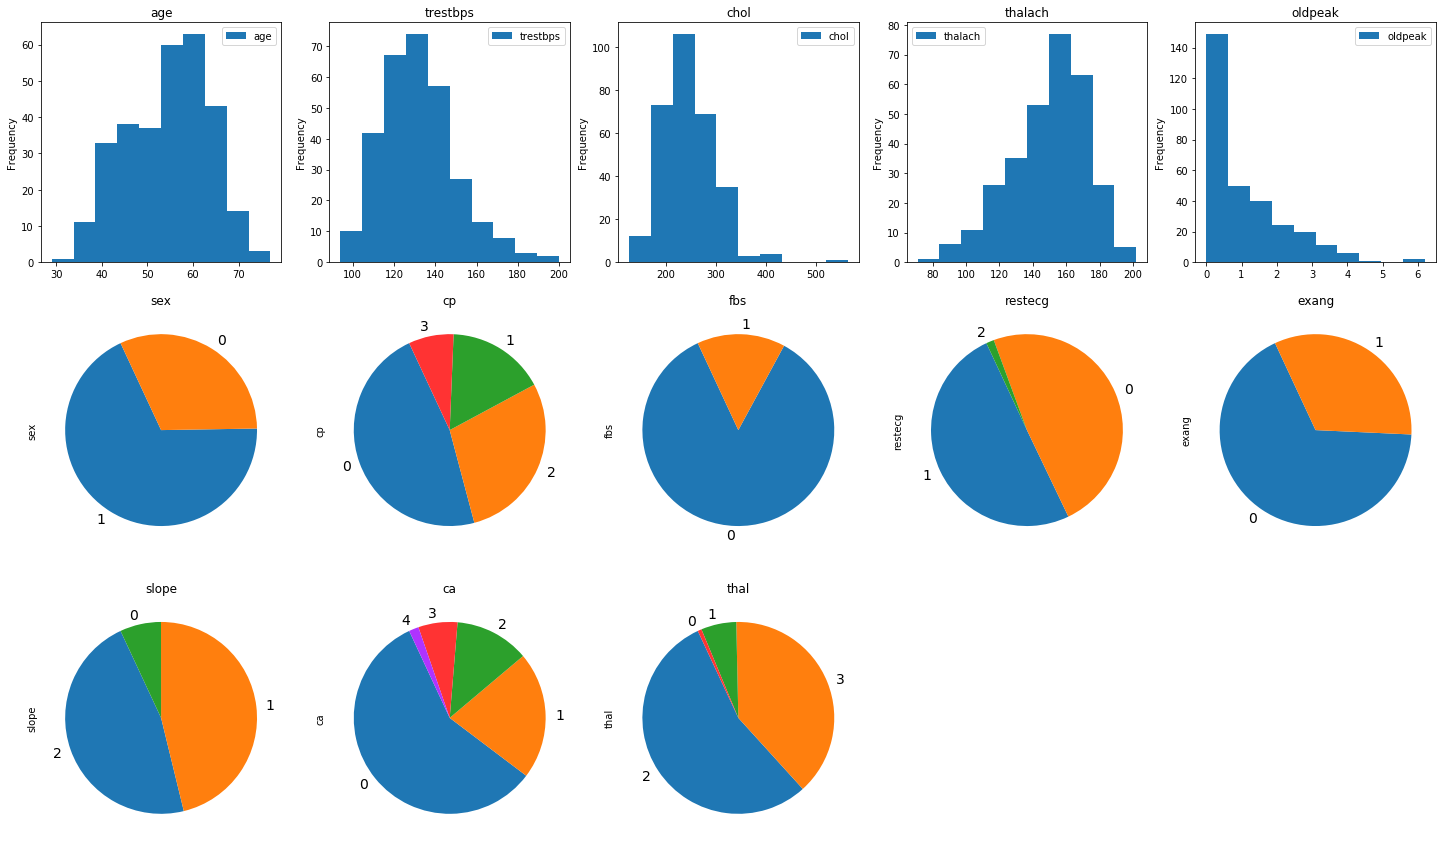

In [10]:
#Configuración de colores
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#FF3333", "#AF33FF"]    #blue, Orange, green, red, morado

# declarando un objeto tipo Figura para desarrollar los subplots
fig = plt.figure(figsize=(25, 15))

x = 1
# Graficas de tipo Histograma Variables Númericas
for numAtt in numericAttributes:
    ax = fig.add_subplot(3,5,x)
    data_heart_x[[numAtt]].plot(kind='hist', ax=ax, rwidth=1)
    plt.title(numAtt)
    x = x + 1

# Graficas de tipo Pie para Variables Categoricas
x = 6
for catAtt in categAttributes:
    ax = fig.add_subplot(3,5,x)
    data_heart_x[catAtt].value_counts().plot(kind='pie', ax=ax, startangle=115, fontsize=14, colors=colors)
    plt.title(catAtt)
    x = x + 1


plt.show()

### Ahora se usa histogramas para las variables categoricas

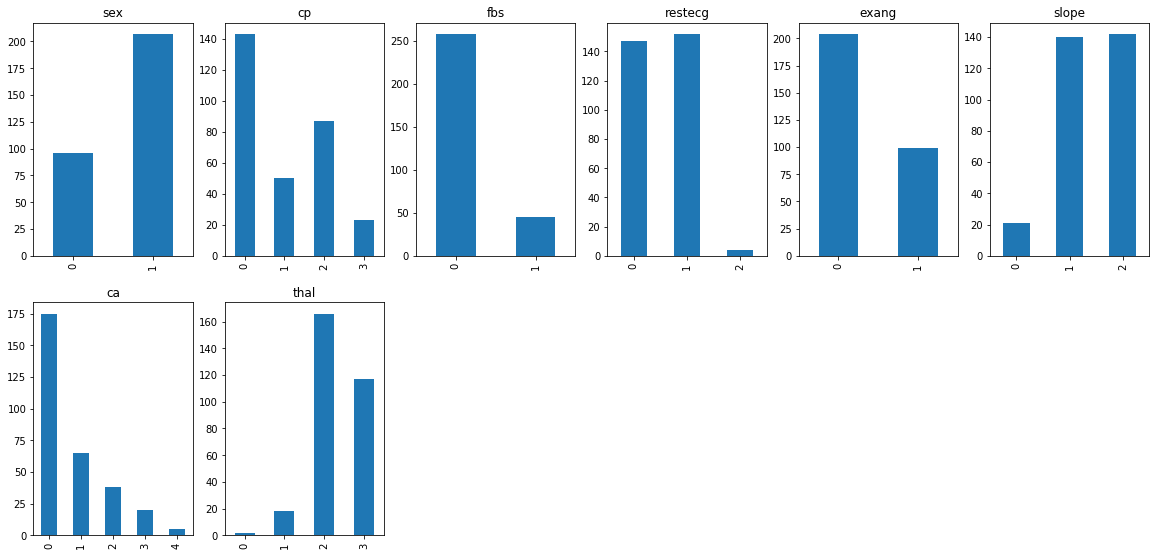

In [11]:
fig = plt.figure(figsize=(30, 60))
x = 1
for catAtt in categAttributes:
    ax = fig.add_subplot(6,6,x)
    data_heart_x[catAtt].value_counts(sort=False).plot(kind='bar', ax=ax, figsize=(20, 30)).set_title(catAtt)
    x = x + 1
plt.show()

## Se evalua si algunas variables tienen algun poder de clasificación

### Violin plots

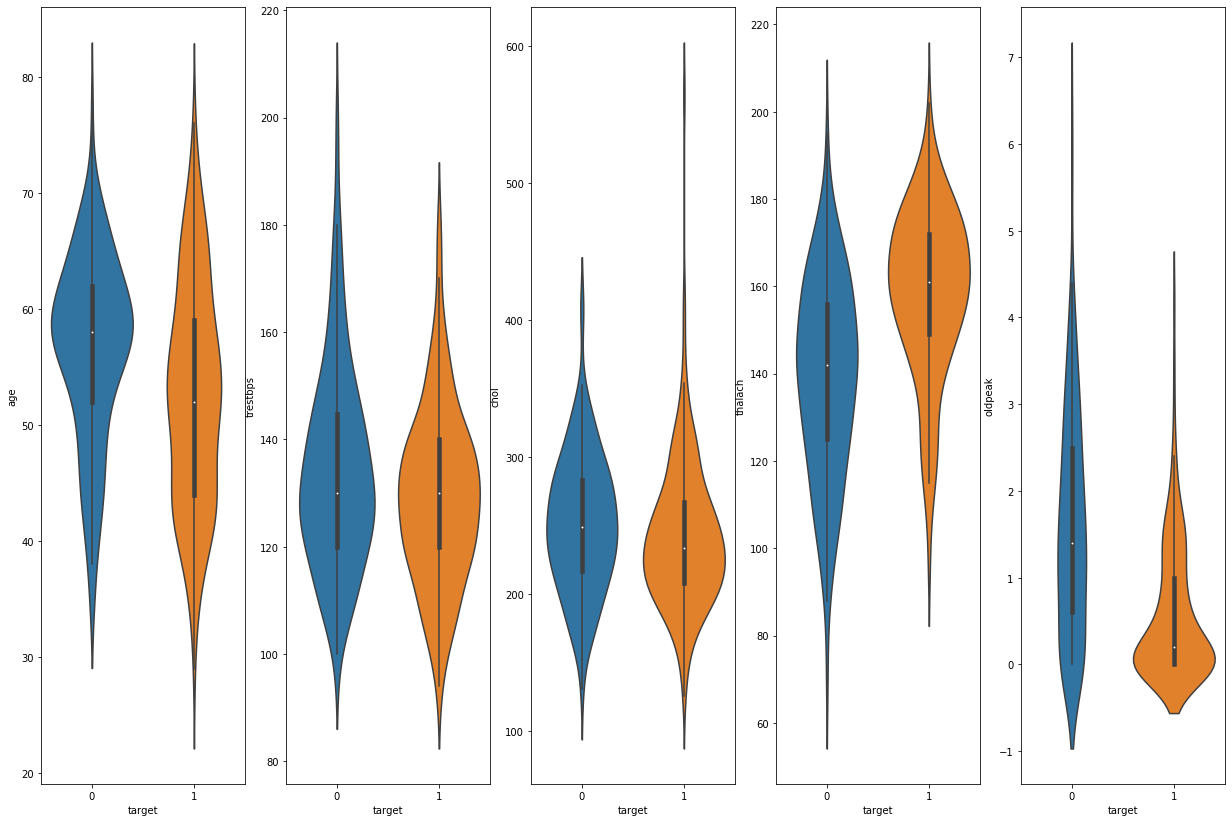

In [12]:
fig = plt.figure(figsize = (30, 100))
x = 1
for numAtt in numericAttributes:
    ax = fig.add_subplot(6,7,x)
    sns.violinplot(x = "target", y = numAtt, data = data_heart_x)
    x = x + 1

### Box plots

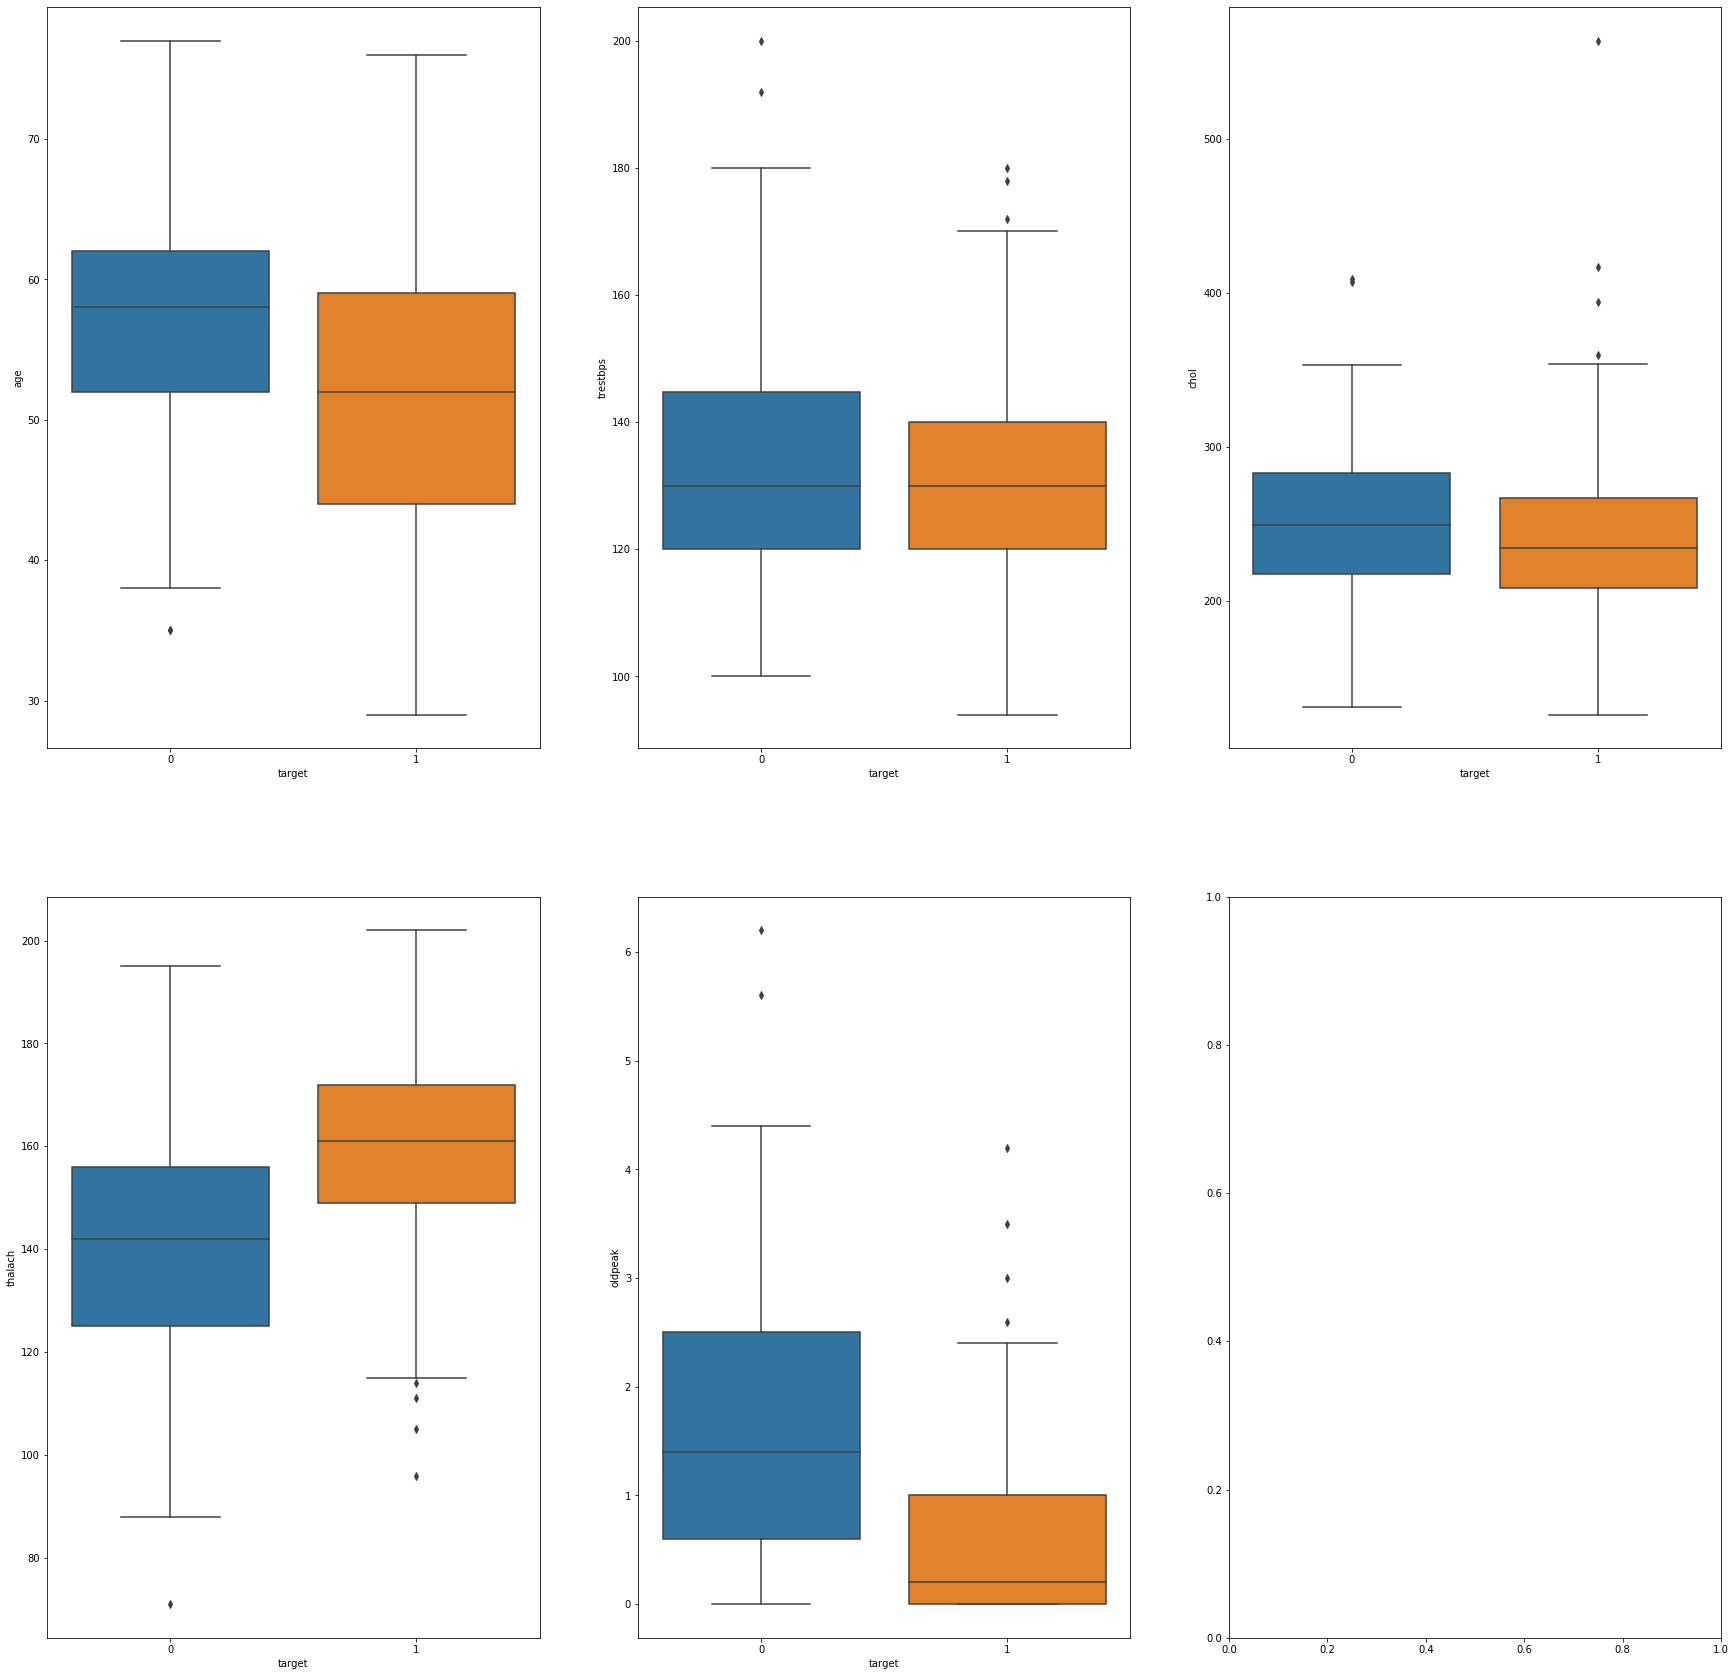

In [13]:
f, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30,30))
axes = axes.flatten()
x = 0
for numAtt in numericAttributes:
    # ax = fig.add_subplot(6,7,x)
    sns.boxplot(x = "target", y = numAtt, data = data_heart_x, ax=axes[x])
    x = x + 1

### Categorical vs Categorical

#### Intentamos determinar si algunas variables categoricas tienen algún poder de clasificación.

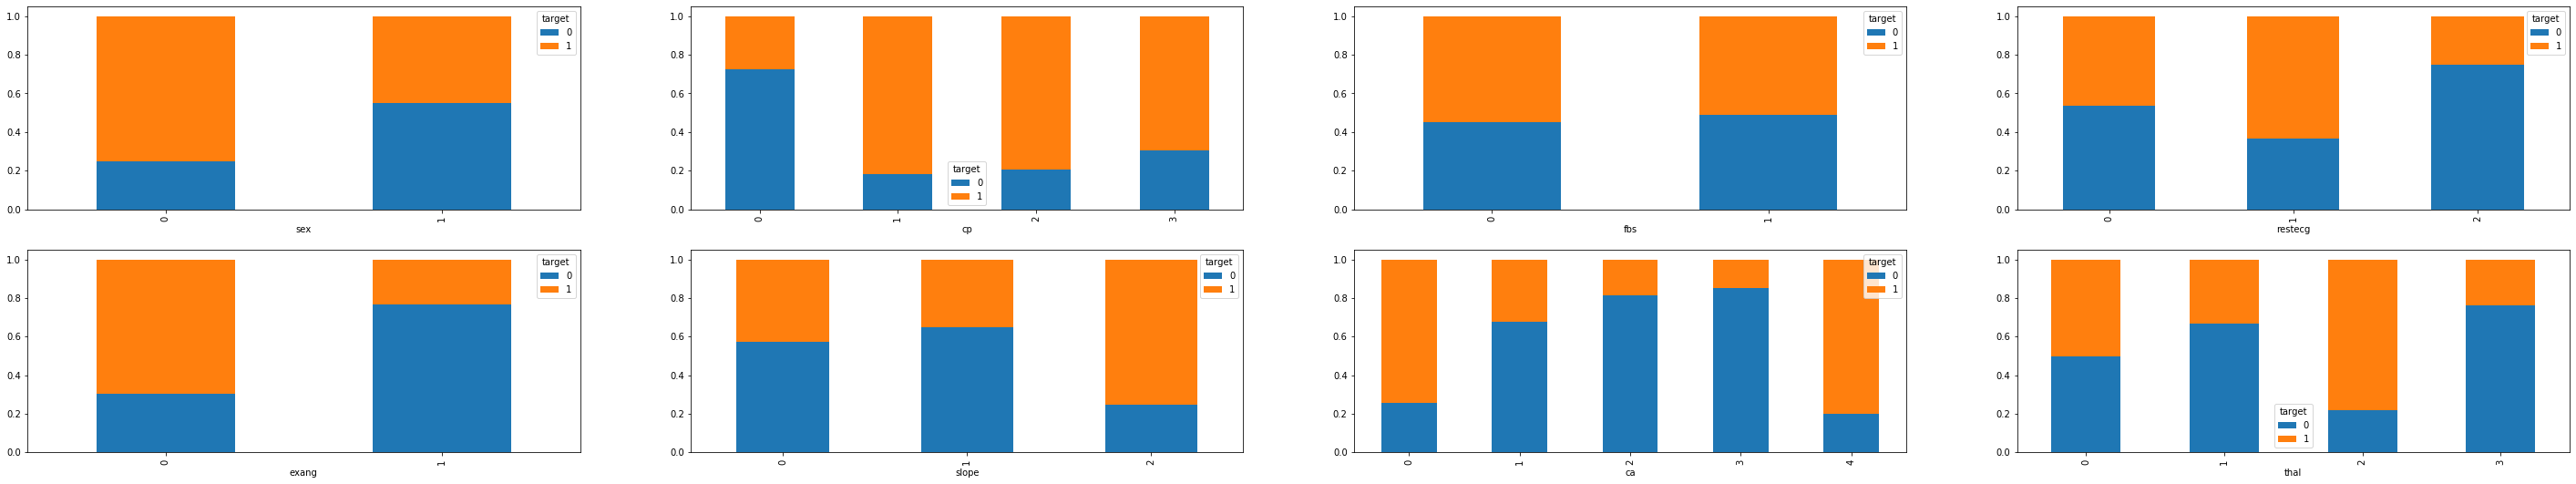

In [14]:
f, axes = plt.subplots(nrows = 2, ncols = 4)
axes = axes.flatten()
x = 0
for catAtt in categAttributes:
    cross = pd.crosstab(index=data_heart_x[catAtt], 
                        columns=data_heart_x["target"],
                        normalize='index')
    cross.plot(kind="bar", 
                 figsize=(50,9),
                 stacked=True,
                 ax=axes[x])

    #sns.countplot(y = catAtt, hue="JobSatisfaction", data=data, ax=axes[x]);
    x = x + 1

# 5. Complete o remueva los elementos faltantes del conjunto de datos si existen

In [15]:
#Revisión por columnas
print('Datos nulos DataSet heart: {}'.format(data_heart_x.isnull().sum().sum()))

Datos nulos DataSet heart: 0


In [16]:
#Revisión por filas
df_no_missing = data_heart_x.dropna()

print('Número de Registros antes del borrado: {}'.format(data_heart_x.shape[0]))
print('Número de Registros despues del borrado: {}'.format(df_no_missing.shape[0]))
print('Porcentaje de Perdida de datos: {:.2f}%'.format(100-(df_no_missing.shape[0]*100)/data_heart_x.shape[0]))

Número de Registros antes del borrado: 303
Número de Registros despues del borrado: 303
Porcentaje de Perdida de datos: 0.00%


In [17]:
#Se cuentan los valores nulos por variable
display(data_heart_x.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# 6. Preparar datos para classificación

In [18]:
#Pasamos nuestras variables categoricas a numerícas
data_heart_x2 = data_heart_x.copy()

for catAtt in categAttributes:
    dummies = pd.get_dummies(data_heart_x2[catAtt], prefix = catAtt)
    data_heart_x2 = pd.concat([data_heart_x2.drop(catAtt, axis = 1), dummies], axis = 1)

In [19]:
#Contamos cuantos registros hay y cuantas columnas se tiene

print('Número de Registros: {:,}'.format(data_heart_x2.shape[0]))
print('Número de Columnas : {}'.format(data_heart_x2.shape[1]))

data_heart_x2.head()

Número de Registros: 303
Número de Columnas : 31


,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [20]:
data_heart_x2.dtypes

age            int64
trestbps       int64
chol           int64
thalach        int64
oldpeak      float64
target         int64
sex_0          uint8
sex_1          uint8
cp_0           uint8
cp_1           uint8
cp_2           uint8
cp_3           uint8
fbs_0          uint8
fbs_1          uint8
restecg_0      uint8
restecg_1      uint8
restecg_2      uint8
exang_0        uint8
exang_1        uint8
slope_0        uint8
slope_1        uint8
slope_2        uint8
ca_0           uint8
ca_1           uint8
ca_2           uint8
ca_3           uint8
ca_4           uint8
thal_0         uint8
thal_1         uint8
thal_2         uint8
thal_3         uint8
dtype: object

# 7. Divida el conjunto de datos en 2: 80% para entrenamiento y 20% para pruebas

In [21]:
# Se divide el set de datos en dos conjuntos train y test
y = data_heart_x2['target'].values
x = data_heart_x2.drop("target", axis = 1)

# Split the data into train and test
trainX, testX, trainY, testY = train_test_split(x, y, test_size=0.2)
print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)

(242, 30) (242,)
(61, 30) (61,)


# 8.Entrenamiento modelo de árbol de decisión

####  Para la medida de selección de atributos se utiliza el indice Gini,  cuanto mayor sea el valor del gini mayor será la homogeneidad

In [22]:
#Se entrena el árbol de decisión, mediante pruebas se toma como maxima profundidad del árbol 11 y la división 20
max_depthx = 11
min_samples_splitx = 20
model_tree = DecisionTreeClassifier(max_depth = max_depthx, 
                                             min_samples_split = min_samples_splitx, 
                                             random_state = 1)

model2 = model_tree.fit(trainX, trainY)

#(criterion='entropy', min_samples_split=20, min_samples_leaf=5, max_depth = 11, class_weight={1:3.5})


### Entrenamiento 

Entrenamiento:  0.8842975206611571
matriz de confusión: 
Precisión matriz de confusión:  0.8842975206611571


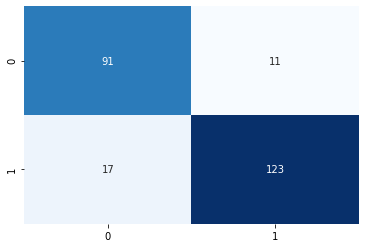

In [23]:
#Entrenamiento (%)
#Dado que es un problema de clasificación por encima del 50% es bueno y por debajo es malo
print("Entrenamiento: ", model2.score(trainX, trainY))

#Diagonal verdaderos positivos (aciertos del modelo de clasificación)
#Por fuera de la diagonal las fallas
print("matriz de confusión: ")
mc_train = confusion_matrix(model2.predict(trainX), trainY)
sns.heatmap(mc_train, annot=True, cmap="Blues", fmt="d", cbar=False)

#Accuracy
accuracy_traint = ((mc_train[0][0] + mc_train[1][1])/242)
print("Precisión matriz de confusión: ", accuracy_traint)

#### Dado que nuestro objetivo tiene solo dos valores (no enfermo o enfermo) para que nuestro modelo sea bueno debe sobrepasar el 50% y aqui vemos que lo cumple, la precisión alcanza el 90%.

#### La matriz de confusión muestra que los datos de entrenamiento alcanzan una gran cantidad de aciertos y pocas fallas.

### Prueba 

Prueba:  0.7377049180327869
matriz de confusión: 
Precisión matriz de confusión:  0.7377049180327869


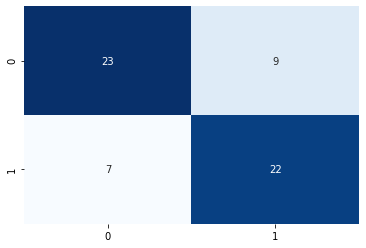

In [24]:
#Prueba (%)
#Dado que es un problema de clasificación por encima del 50% es bueno y por debajo es malo
print("Prueba: ", model2.score(testX, testY))

#Diagonal verdaderos positivos (aciertos del modelo de clasificación)
#Por fuera de la diagonal las fallas
print("matriz de confusión: ")
mc_test = confusion_matrix(model2.predict(testX), testY)
sns.heatmap(mc_test, annot=True, cmap="Blues", fmt="d", cbar=False)

#Accuracy
accuracy_test = ((mc_test[0][0] + mc_test[1][1])/61)
print("Precisión matriz de confusión: ", accuracy_test)

#### Para el set de datos de prueba se tiene una precisón un poco menor que en el set de entrenamiento, pero que es buena dado que esta por encima del 50%. Las fallas vienen siendo menores en comparación con los aciertos. 

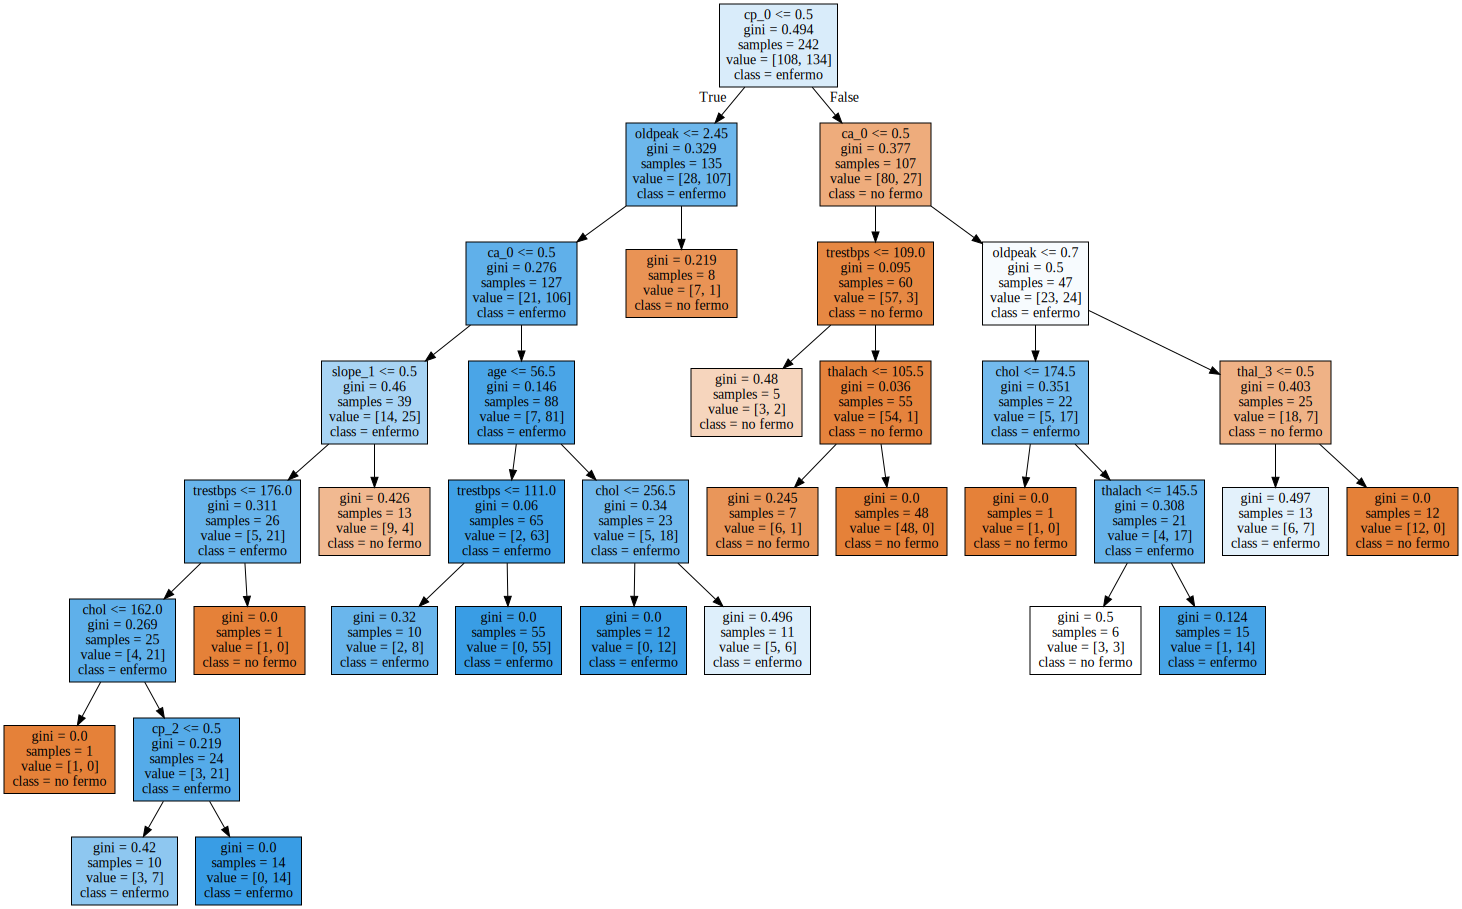

In [25]:
class_names = ['no fermo','enfermo']
features_heart_labels = x.columns

graph = Source(tree.export_graphviz(model2, out_file=None,
                                    feature_names=features_heart_labels, 
                                    class_names=class_names, filled = True))

display(SVG(graph.pipe(format='svg')))

#### Se tiene a evaluar las dos clases de la variable target (0: no enfermo, 1:enfermo), cada variable elegida para ser evaluada, cuando el gini sea cero o tienda a cerlo es más puro.

## Interpretación del modelo árbol de decisión 

El árbol de desición varia en su precisión dependiendo de su profundidad y las hojas que contiene este, a partir de ello y con la obtención de resultados mejores se realizan cambios en max_depth y min_samples_split.

Con un maximo de profundidad en 11 y minimo de muestras a dividir en 20, se puede entrenar el árbol de decisión para que se obtenga precisión tanto en los datos de entrenamiento como de prueba superior al 70%.

La precisión mostrada por la matriz de confusión llega a ser superior o igual a 70%, que da a entender que el modelo tiene un mayor número de aciertos en comparación con las fallas, en este sentido es un modelo bueno.


# 9. Entrenamiento modelo de Naive Bayes 

Entrenamiento:  0.8305785123966942
Precisión matriz de confusión:  0.8305785123966942


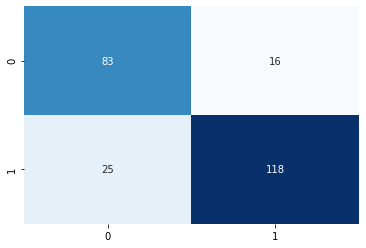

In [26]:
model_gnb = GaussianNB()
model3 = model_gnb.fit(trainX, trainY)

#Print the score on the train data
print("Entrenamiento: ", model3.score(trainX, trainY))
matrix1 = confusion_matrix(model3.predict(trainX), trainY)
sns.heatmap(matrix1, annot=True, cmap="Blues", fmt="d", cbar=False)

#Accuracy
accuracy_traint_gnb = ((matrix1[0][0] + matrix1[1][1])/242)
print("Precisión matriz de confusión: ", accuracy_traint_gnb)

Prueba:  0.8852459016393442
Precisión matriz de confusión:  0.8852459016393442


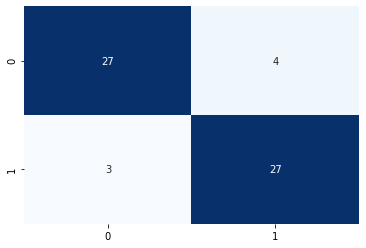

In [27]:
#Print the score on the test data
print("Prueba: ", model3.score(testX, testY))
matrix2 = confusion_matrix(model3.predict(testX), testY)
sns.heatmap(matrix2, annot=True, cmap="Blues", fmt="d", cbar=False)

#Accuracy
accuracy_test_gnb = ((matrix2[0][0] + matrix2[1][1])/61)
print("Precisión matriz de confusión: ", accuracy_test_gnb)

## Interpretación del modelo obtenido 

El modelo Naive Bayes que genera una clasificación probabilistica de hipotesis, generada en este conjunto de registros y muestras una mayor cercania entre los conjuntos de entrenamiento y prueba. Una ventaja de este modelo es la rapidez del proceso de entrenamiento y test.

La precisión mostrada por la matriz de confusión llega a ser superior o igual a 60%, esto da a entender que el modelo tiene un mayor número de aciertos en comparación con las fallas, en este sentido es un modelo bueno.

# 10. Entrenamiento modelo Red Neuronal

Entrenamiento:  0.7727272727272727
Precisión matriz de confusión:  0.7727272727272727


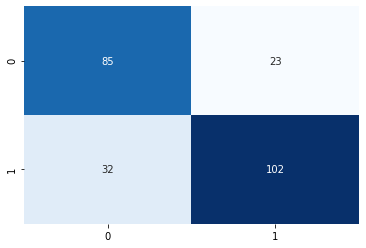

In [28]:
# NN is sensitive to data scale. We must normilize 
scaler = StandardScaler()  
X_trainX = trainX.copy()
X_testX = testX.copy()

# Don't cheat - fit only on training data
scaler.fit(trainX)

X_trainX = scaler.transform(X_trainX)  
# apply same transformation to test data
X_testX = scaler.transform(X_testX)  

modelNeuralNetwork = MLPClassifier(solver='lbfgs', alpha=1e-3, activation = 'relu', max_iter=5000,
                     hidden_layer_sizes = (12,10,8,6,4,2), random_state=1, verbose = True)

modelNeuralNetwork.fit(X_trainX, trainY)                         

#Print the score on the train data
print("Entrenamiento: ", modelNeuralNetwork.score(X_trainX, trainY))
matrixNeuralNetwork1 = confusion_matrix(trainY, modelNeuralNetwork.predict(X_trainX))
sns.heatmap(matrixNeuralNetwork1, annot=True, cmap="Blues", fmt="d", cbar=False)

#Accuracy
accuracy_traint_network = ((matrixNeuralNetwork1[0][0] + matrixNeuralNetwork1[1][1])/242)
print("Precisión matriz de confusión: ", accuracy_traint_network)

Prueba:  0.7704918032786885
Precisión matriz de confusión:  0.7704918032786885


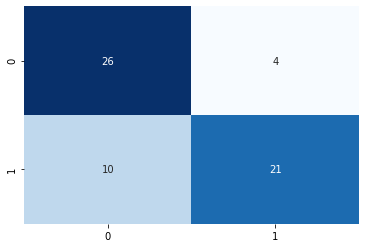

In [29]:
#Print the score on the test data
print("Prueba: ", modelNeuralNetwork.score(X_testX, testY))
matrixNeuralNetwork2 = confusion_matrix(testY, modelNeuralNetwork.predict(X_testX))
sns.heatmap(matrixNeuralNetwork2, annot=True, cmap="Blues", fmt="d", cbar=False)

#Accuracy
accuracy_test_network = ((matrixNeuralNetwork2[0][0] + matrixNeuralNetwork2[1][1])/61)
print("Precisión matriz de confusión: ", accuracy_test_network)

## Interpretación del modelo obtenido 

La red neuronal genera una propagación por capas de los datos de entrada, esta propagación neurona por neurona genera una señal contribuyendo a generar el dato de salida y un error total generado a partir de todas las capas involucradas en el tratamiento de los datos.

Las predicciones para los datos de entrenamiento y test son buenos dado dado que en ambos casos sobrepasan el 50%.

# 11. COMPARACIÓN DE LOS TRES MODELOS

### Se busca que la precision sea alta

In [30]:
print("precision arbol de decision: ",accuracy_test)
print("precision naive bayes: ",accuracy_test_gnb)
print("precision red neuronal: ",accuracy_test_network)

precision arbol de decision:  0.7377049180327869
precision naive bayes:  0.8852459016393442
precision red neuronal:  0.7704918032786885


###  Estabilidad

In [31]:
print("estabilidad arbol de decision: ",abs(model_tree.score(trainX, trainY)*100 - model_tree.score(testX, testY)*100))
print("estabilidad naive bayes: ",abs(model2.score(trainX, trainY) * 100 - model2.score(testX, testY) * 100))
print("estabilidad red neuronal: ",abs(modelNeuralNetwork.score(X_trainX, trainY)*100 - modelNeuralNetwork.score(X_testX, testY)*100))

estabilidad arbol de decision:  14.659260262837023
estabilidad naive bayes:  14.659260262837023
estabilidad red neuronal:  0.22354694485841264


### Interpretabilidad 

Dado el conjunto de datos, se generan a partir de estos predicciones de las enfermedades relacionadas con el corazon, se generan los ajustes para que los resultados de estos modelos sean acordes con la finalidad que se espera, los resultados son buenos y no son muy distantes tanto en su precisión como en su estabilidad 

# CONCLUSIÓN

Dado el conjunto de datos y vistos los resultados tanto de precisión como de estabilidad, para este caso y sus conjuntos de datos es recomendable usar el modelo de naive bayes, si observamos vemos que tiene la mayor precisión entre los tres modelos y una buena estabilidad.

